# TP1 : signaux, notions de base

Dans ce premier TP, nous reprenons quelques notions de base des signaux et systèmes.

**Note :** Le cours porte uniquement sur les signaux *analogiques*, c'est-à-dire définis sur un espace de temps continu (et à valeurs dans un espace continu). Nos ordinateurs "parlent" de manière discrète, et il est donc difficile de manier des signaux analogiques. Ici, nous nous contenterons d'échantillonner très finement nos signaux, et considèrerons qu'il s'agit bien de signaux analogiques. Cependant, nous serons dès lors en train de manipuler des signaux échantillonnés. Il existe en réalité une théorie et un cadre mathématique pour traiter du passage des signaux analogiques aux signaux échantillonnés, que beaucoup d'entre vous rencontreront probablement plus tard dans votre cursus universitaire (ou ont peut-être déjà rencontré).

Commencons par une ligne de magie Jupyter et par charger les librairies dont nous aurons besoin aujourd'hui :

In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import scipy.io.wavfile as wavfile
import scipy.integrate as integrate

## 1. Définition et représentation de signaux
Pour chaque signal $x(t)$ auquel nous allons nous intéresser, nous utiliserons une fonction python qui prend comme premier argument un temps $t$ et retourne $x(t)$.

**A vous :** Définir deux fonctions `x_1` et `x_2` qui correspondent aux signaux :

$x_1(t) = Acos(2\pi f_0 t)$, pour $A>0$ et $t_0>0$.

et

$$x_2(t) = \begin{cases}t &\,\,\mathrm{pour}\,\, t\in[0,1],\\
2-t &\,\,\mathrm{pour}\,\, t\in]1,2],\\
0 &\,\,\mathrm{sinon.}\,\,\end{cases}$$

**Note** : Au cours des TPs, des signatures des fonctions demandées vous sont proposées. Elles sont constituées d'une ligne de définition, contenant des paramètres possibles pour la fonction, et d'une ligne contenant simplement `return` (que vous devrez compléter). Il est toujours possible de résoudre le problème proposé en utilisant ces signatures, mais vous pouvez choisir de ne pas vous en servir si vous préférez concevoir autrement vos fonctions.

In [2]:
def x_1(t, A=51, f_0=1):
    #TODO
    return 

def x_2(t):
    #TODO
    return 

Afin de pouvoir représenter nos signaux, leur appliquer des opérations, ou tester empiriquement leurs propriétés, nous allons en tirer un très grand nombre d'échantillons très rapprochés :

In [3]:
t_echant = np.linspace(-5, 5, 10000)

Nous pouvons maintenant créer une liste des valeurs prises par nos signaux pour tous les instants dans `t_echant`, par exemple :

In [4]:
x_1_out = [x_1(t) for t in t_echant]

Notez la syntaxe dans la cellule ci-dessus ; il s'agit de _list comprehension_, un puissant outil de python.


**A vous :** représenter les signaux $x_1$ et $x_2$ pour $t\in[-5, 5]$.

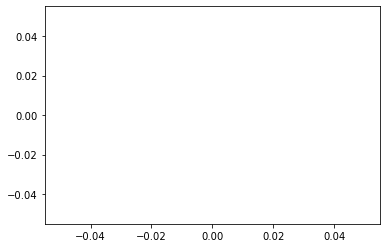

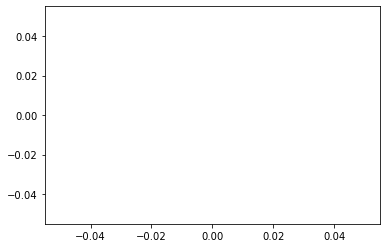

In [5]:
plt.plot()
plt.show()
plt.close()

plt.plot()
plt.show()

**A vous** : définir la fonction de Heaviside, $\Gamma(t)$, et la fonction porte $\Pi_T(t)$. Représentez-les pour vérifier vos fonctions.

In [6]:
def heaviside(t):
    return

def porte(t, T=1):
    return

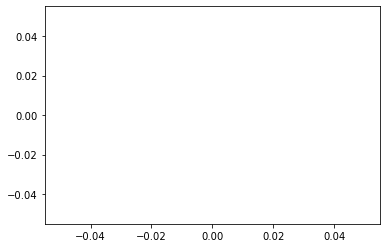

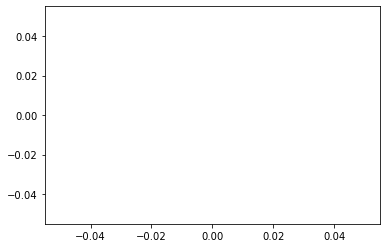

In [7]:
plt.plot()
plt.show()
plt.close()

plt.plot()
plt.show()

## 2. Opérations élémentaires
Pour tout signal représenté par une fonction python, nous voudrions pouvoir obtenir une _autre_ fonction qui correspond au signal d'entrée, ayant subi une transformation élémentaire. Rappelez-vous qu'en python, une fonction peut recevoir une autre fonction comme argument !

**A vous** : Ecrire une fonction `affine` qui recoit un signal $x(t)$ en entrée et retourne un signal $y(t) = x(at -b)$.

**Indice** : Pour commencer, vous pouvez écrire _deux_ fonctions. L'une prend aussi $t$ comme argument ; l'autre appelle celle-ci pour tout $t$ afin de retourner une fonction $y(t)$. 

**Question** : Que remarquez-vous quant à la nature de notre fonction `affine` ?

In [8]:
def affine(x, a=1, b=0):
    #TODO
    return 

Appliquons maintenant quelques opérations élémentaires. Avant de représenter les signaux transformés à l'écran, essayez d'abord de les dessiner sur papier, puis vérifiez que les deux correspondent. 

**A vous** : En utilisant la fonction `affine`, définissez et représentez sur $t\in[-5,5]$ les signaux suivant :

- $x_{11}(t)$, correspondant à $x_1$ après renversement temporel ;
- $x_{12}(t)$, correspondant à $x_1$ après un changement d'échelle temporelle (dilation d'un facteur 2) ;
- $x_{21}(t)$, correspondant à $x_2$ après translation temporelle de $t_0=1$ ;
- $x_{22}(t)$, correspondant à $x_2$ ayant subi un changement d'échelle temporelle (compression d'un facteur 2) et une translation temporelle de $t_0=-2$;
- **bonus** : $\Pi_{T_0, T_1}$, la fonction qui vaut $1/(T_1 - T_0)$ sur $[T_0, T_1]$ et 0 ailleurs.

In [9]:
x_11 = affine(x_1, ...) #TODO

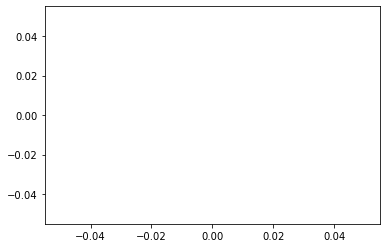

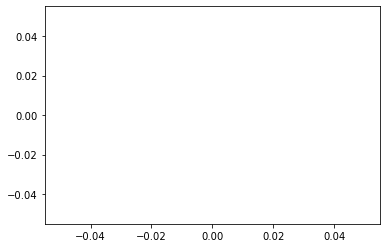

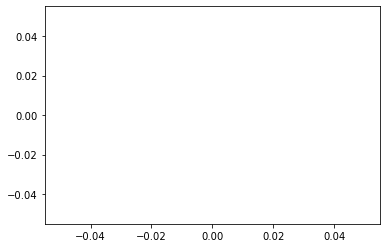

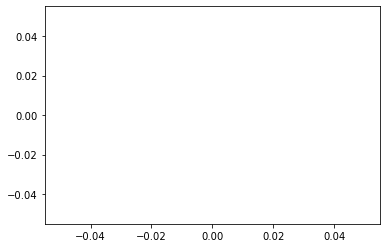

In [10]:
plt.plot()
plt.show()
plt.close()

plt.plot()
plt.show()
plt.close()

plt.plot()
plt.show()
plt.close()

plt.plot()
plt.show()

## 3. Propriétés élémentaires
Dans cette section, nous allons étudier certaines propriétés élémentaires de nos signaux. En particulier, nous allons tester empiriquement - c'est-à-dire pour un certain nombre de valeurs de $t$ - s'ils vérifient certaines propriétés.

Bien sûr, ici, nos signaux sont très simples, et on connaît leur expression mathématique. Il est donc beaucoup plus simple de déterminer analytiquement (voire d'utiliser son intuition) pour savoir s'ils vérifient une certaine propriété - ce que je vous invite d'ailleurs à faire avant de vérifier empiriquement la réponse.

Cependant, dans la "vraie vie," il arrive souvent que nous nous trouvions face à un signal dont on ne connaît pas l'expression, et/où que nous ne pouvons observer que pour certaines valeurs de $t$. Songez par exemple un à un signal radio d'origine inconnue. Dans de telles situations, une étude empirique nous permet d'émettre des hypothèses quand aux propriétés du signal en question, ce qui peut nous informer sur sa nature.

**Bonus** : un peu de [lecture](https://en.wikipedia.org/wiki/Peryton_(astronomy)) (en anglais) sur un tel exemple.

### 31. Périodicité

**A vous** : Ecrire une fonction `test_period` qui teste, pour une période $T_0$ donnée, si un signal `x(t)` semble périodique en essayant un grand nombre de valeurs. 

**Indice** : pour montrer qu'un signal n'est pas périodique, il suffit qu'_une_ valeur testée permette d'invalider l'hypothèse. A l'inverse, le mieux que nous puissions espérer faire empiriquement est de ne _pas_ rejeter l'hypothèse.

**Bonus** : `test_period` peut également imprimer à l'écran le nombre de valeurs pour lesquelles l'hypothèse de périodicité est rejetée, et le nombre de valeurs pour lesquelles ce n'est pas le cas. Selon vous, à quoi peut servir ce type de diagnostic ?

In [11]:
def test_period(x, T_0, test_t=t_echant):
    #TODO
    return

**A vous** : Essayez à présent de tester la périodicite de $x_1$ et $x_2$. Que constatez-vous ?

In [12]:
#TODO

(votre réponse)

**Bonus** : Déterminer la source du problème et proposer un moyen de le régler.

In [13]:
#TODO

### 32. Causalité

**A vous** : Ecrire une fonction `test_caus` qui teste si un signal $x(t)$ semble causal, non-causal, ou anti-causal.

In [14]:
def test_caus(x):
    #TODO
    return

**A vous** : Après avoir émis votre propre hypothèse pour $x_1, x_{11}, x_{12}, x_2, x_{21}, x_{22}$, utilisez votre fonction pour la vérifier.

In [15]:
#TODO

### 33. Parité

**A vous** : Ecrire une fonction `test_par` qui teste si un signal $x(t)$ semble pair, impair, ou aucun des deux.

In [16]:
def test_par(x):
    #TODO
    return

**A vous** : L'appliquer à $x_1$ et $x_2$. Que dire de $x_{11}$ ?

In [17]:
#TODO

(votre réponse)

**A vous** : Définir une fonction `decomp_par` qui effectue la décomposition :

$$x(t) = x_\mathrm{pair}(t) + x_\mathrm{impair}(t)$$

avec $x_\mathrm{pair}(t)$ un signal pair et $x_\mathrm{impair}(t)$ un signal... impair.

**Indice** : Vous pouvez vous inspirer d'`affine`.

In [18]:
def decomp_par(x):
    #TODO
    return

**A vous** : L'appliquer à $x_2$ et représenter $x_2$ et ses deux composantes (paire et impaire) sur le même graphe.

In [19]:
#TODO

## 4. Puissance et énergie
Nous allons maintenant nous servir de python pour calculer des approximations de la puissance moyenne et de l'énergie d'un signal. Comme précédemment, il serait tout à fait naturel de questionner l'intérêt de calculer des approximations numériques de quantités que nous pouvons calculer à la main. Cette approche nous permet cependant, comme pour les tests empiriques de propriétés élémentaires, de vérifier nos calculs, et de nous placer dans les conditions (fréquentes en pratique) où les signaux d'entrées ne sont pas connus (ou pas connus parfaitement).

C'est, de plus, une bonne excuse pour faire un petit peu de calcul intégral en python, ce qui peut s'avérer utile même au delà de ce cours.

**A vous** : Ecrire une fonction qui retourne la puissance instantanée, $p_x(t)=|x(t)|^2$, pour un signal $x$.

In [20]:
def p_inst(x):
    #TODO
    return

**A vous** : Ecrire une fonction qui approxime l'intégrale de $p_x(t)$ entre $-T/2$ et $T/2$, puis une fonction qui calcule

$$\frac{1}{T}\int_{-T/2}^{T/2}p_x(t)dt$$

pour tout $T$.

**Indice** : Vous pouvez vous servir de la [documentation](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html) de `scipy.integrate`.

In [21]:
def int_p(x, T):
    #TODO
    return 

def integrande(x, T):
    #TODO
    return 

**A vous** : Après les avoir déterminées analytiquement (ou récuperées de votre corrigé de TD), estimer l'énergie de $x_1$ et $x_2$.

In [22]:
#TODO

**Question** : Que remarquez-vous ?

(votre réponse)

**A vous** : En appelant `integrande` sur de plus en plus grandes valeurs de $T$, estimez la puissance moyenne de $x_1$.

In [23]:
#TODO

**Bonus** : Faire de même pour $x_2$. Le résultat vous semble-t-il correct ? Essayez à présent d'intégrer simplement $x_2$, en utilisant la fonction `integrate.quad`, de $-T/2$ à $T/2$, pour de plus en plus grandes valeurs de $T$. Que constatez-vous ?